Shape original: (20827, 105)
Shape después de filtrar price > 0: (20827, 105)
   price  log_price
0   66.0   4.189655
1   76.0   4.330733
2   97.0   4.574711
3   60.0   4.094345
4  425.0   6.052089


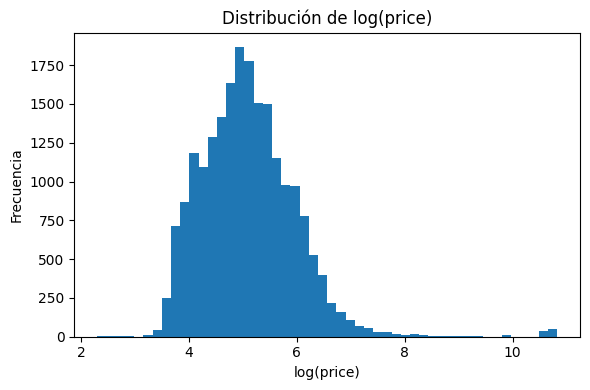

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fijo semilla para que los resultados sean reproducibles
np.random.seed(42)

# Cargo la base ya limpia del modelo 1
df = pd.read_csv("df_cleaned.csv")

print("Shape original:", df.shape)

# Me quedo solo con registros que tengan precio positivo
df = df[df["price"] > 0].copy()
print("Shape después de filtrar price > 0:", df.shape)

# Creo la variable objetivo en escala logarítmica
df["log_price"] = np.log(df["price"])

# Reviso rápido cómo queda price y log_price
print(df[["price", "log_price"]].head())

# Histograma de log(price) para ver la distribución
plt.figure(figsize=(6, 4))
plt.hist(df["log_price"], bins=50)
plt.title("Distribución de log(price)")
plt.xlabel("log(price)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


In [73]:
from sklearn.model_selection import train_test_split

# Tomo únicamente columnas numéricas (incluye dummies 0/1)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Saco del set de features las columnas de precio
numeric_cols.remove("price")
numeric_cols.remove("log_price")

print("Número de features numéricas:", len(numeric_cols))

X = df[numeric_cols].values
y = df["log_price"].values

print("Shape X:", X.shape)
print("Shape y:", y.shape)

# Dejo 20% de los datos para prueba final
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)


Número de features numéricas: 98
Shape X: (20827, 98)
Shape y: (20827,)
Train: (16661, 98) (16661,)
Test : (4166, 98) (4166,)
